In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutuala_info_classif
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix,f1_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data= pd.read_csv('c:dataset.csv')
severity = pd.read_csv('c:Symptom-severity.csv')
description = pd.read_csv('c:symptom_Description.csv')
precaution = pd.read_csv('c:symptom_precaution.csv')

In [3]:
combined = pd.merge(data,description,on='Disease') #combining 2 dataframes
combined.shape

(4560, 19)

In [4]:
combined = pd.merge(combined,precaution,on='Disease') #combining another one

In [5]:
combined.sample(5)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
313,GERD,stomach_pain,acidity,ulcers_on_tongue,vomiting,cough,chest_pain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Gastroesophageal reflux disease, or GERD, is a...",avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
406,Chronic cholestasis,itching,vomiting,yellowish_skin,nausea,loss_of_appetite,yellowing_of_eyes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Chronic cholestatic diseases, whether occurrin...",cold baths,anti itch medicine,consult doctor,eat healthy
3826,Osteoarthristis,joint_pain,neck_pain,knee_pain,hip_joint_pain,swelling_joints,painful_walking,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Osteoarthritis is the most common form of arth...,acetaminophen,consult nearest hospital,follow up,salt baths
139,Allergy,continuous_sneezing,shivering,chills,watering_from_eyes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,An allergy is an immune system response to a f...,apply calamine,cover area with bandage,NaN,use ice to compress itching
3210,Heart attack,vomiting,breathlessness,sweating,chest_pain,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,The death of heart muscle due to the loss of b...,call ambulance,chew or swallow asprin,keep calm,NaN


In [6]:
#dataset charctersitics
combined.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
count,4560,4560,4560,4560,4212,3432,2814,2148,1824,1572,...,504,306,240,192,72,4560,4560,4560,4440,4440
unique,38,30,43,51,46,34,31,25,20,20,...,8,4,3,3,1,38,31,32,28,23
top,Paralysis (brain hemorrhage),vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,...,runny_nose,chest_pain,chest_pain,blood_in_sputum,muscle_pain,Osteoarthritis is the most common form of arth...,Consult nearest hospital,vaccination,consult doctor,medication
freq,120,822,870,726,378,348,390,264,276,228,...,72,96,144,72,72,120,360,240,600,720


In [7]:
#number of disease
len(combined['Disease'].unique())

38

In [8]:
#shape of the dataset(4920 rows and 18 cols)
combined.shape

(4560, 23)

In [9]:
combined.isna().sum()

Disease            0
Symptom_1          0
Symptom_2          0
Symptom_3          0
Symptom_4        348
Symptom_5       1128
Symptom_6       1746
Symptom_7       2412
Symptom_8       2736
Symptom_9       2988
Symptom_10      3120
Symptom_11      3366
Symptom_12      3816
Symptom_13      4056
Symptom_14      4254
Symptom_15      4320
Symptom_16      4368
Symptom_17      4488
Description        0
Precaution_1       0
Precaution_2       0
Precaution_3     120
Precaution_4     120
dtype: int64

In [10]:
del combined['Symptom_4']    #deleting the columns which we dont need
del combined['Symptom_5']   
del combined['Symptom_6']   
del combined['Symptom_7']   
del combined['Symptom_8']   
del combined['Symptom_9']   
del combined['Symptom_10']   
del combined['Symptom_11']   
del combined['Symptom_12']   
del combined['Symptom_13']   
del combined['Symptom_14']   
del combined['Symptom_15']   
del combined['Symptom_16']
del combined['Symptom_17']          

In [11]:
combined = combined.fillna(method='ffill') #doing a forward fill on null values

In [12]:
combined.columns

Index(['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Description',
       'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4'],
      dtype='object')

In [13]:
#removing any whitespaces
cols = combined.columns
data = combined[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(combined.shape)

combined = pd.DataFrame(s, columns=combined.columns)
combined.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
3,Fungal infection,itching,skin_rash,dischromic _patches,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,"In humans, fungal infections occur when an inv...",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths


In [14]:
x = combined[['Symptom_1','Symptom_2','Symptom_3']]
x.head()

,Symptom_1,Symptom_2,Symptom_3
0,itching,skin_rash,nodal_skin_eruptions
1,skin_rash,nodal_skin_eruptions,dischromic _patches
2,itching,nodal_skin_eruptions,dischromic _patches
3,itching,skin_rash,dischromic _patches
4,itching,skin_rash,nodal_skin_eruptions


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
cols=[]
for i in x.columns:
    if x[i].dtypes==object:
        cols.append(i)
x[cols] = x[cols].apply(LabelEncoder().fit_transform)

D:\anaconda\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [18]:
y = combined['Disease']
y.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Gastroenteritis',
       'Bronchial Asthma', 'Migraine', 'Cervical spondylosis',
       'Paralysis (brain hemorrhage)', 'Jaundice', 'Malaria',
       'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis B',
       'Hepatitis C', 'Hepatitis D', 'Hepatitis E', 'Alcoholic hepatitis',
       'Tuberculosis', 'Common Cold', 'Pneumonia', 'Heart attack',
       'Varicose veins', 'Hypothyroidism', 'Hyperthyroidism',
       'Hypoglycemia', 'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=999)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3648, 3) (912, 3) (3648,) (912,)


# Using RandomForestClassifier

In [20]:
model=RandomForestClassifier()

In [21]:
#you can narrow down the values as you keep training
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [22]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

In [23]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   0.9s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   2.3s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=6

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [24]:
rf_random.best_params_


{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [25]:
#using my best parameters
model1 = RandomForestClassifier(bootstrap=True,
 max_depth=30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 1400)

In [26]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=5,
                       n_estimators=1400)

In [27]:
from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_pred=model.predict(X_test)
    accuracy_score(y_test,y_pred)
    print(' Accuracy score : {}'.format(accuracy_score(y_test,y_pred)))



In [28]:
predict(RandomForestClassifier(bootstrap=True,
 max_depth=30,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 1400))

Training score : 0.9514802631578947
 Accuracy score : 0.930921052631579


# Using DECISION TREE with mutual_info_classif

In [29]:
imp=pd.DataFrame(mutual_info_classif(x,y),index=x.columns)
imp

,0
Symptom_1,2.260078
Symptom_2,2.768154
Symptom_3,3.022026


In [30]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Symptom_3,3.022026
Symptom_2,2.768154
Symptom_1,2.260078


In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(X_train , y_train)

DecisionTreeClassifier()

In [33]:
print("Testing Accuracy : " , model.score(X_test , y_test))


Testing Accuracy :  0.944078947368421


# Using XGBoost


In [34]:
clf=XGBClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)

[15:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[[28  0  0 ...  0  0  0]
 [ 0 24  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 19  0  0]
 [ 0  0  0 ...  0 24  0]
 [ 0  0  0 ...  0  0 18]]


<AxesSubplot:>

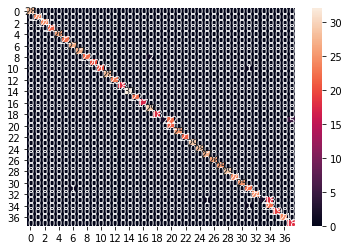

In [35]:
#Confusion metrics
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm, annot=True)

In [36]:
#Accuracy and classification report
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.944078947368421
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        28
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        21
                                Allergy       1.00      1.00      1.00        26
                              Arthritis       1.00      1.00      1.00        22
                       Bronchial Asthma       0.96      1.00      0.98        27
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      0.92      0.96        24
                    Chronic cholestasis       1.00      1.00      1.00        20
                            Common Cold       1.00      0.95      0.98        21
         

In [37]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 42)

Text(0, 0.5, 'Mean Error')

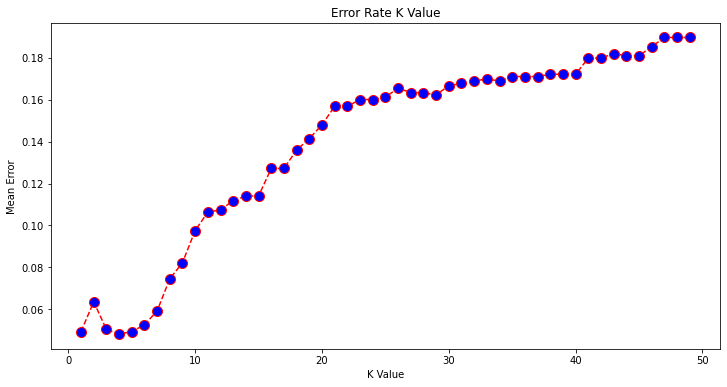

In [38]:
error = []


for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainX, trainY)
    pred_i = knn.predict(testX)
    error.append(np.mean(pred_i != testY))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [39]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(trainX, trainY)

KNeighborsClassifier(n_neighbors=1)

In [40]:
y_pred = classifier.predict(testX)

In [41]:
print(classification_report(testY, y_pred))

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        22
                                   AIDS       1.00      1.00      1.00        29
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        23
                                Allergy       1.00      1.00      1.00        35
                              Arthritis       1.00      1.00      1.00        18
                       Bronchial Asthma       0.96      1.00      0.98        27
                   Cervical spondylosis       1.00      1.00      1.00        27
                            Chicken pox       1.00      0.96      0.98        25
                    Chronic cholestasis       1.00      1.00      1.00        29
                            Common Cold       1.00      1.00      1.00        25
                           

D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using SVC We need to convert everything into int form

In [48]:
co=[]
for i in combined.columns:
    if combined[i].dtypes==object:
        co.append(i)
combined[co] = combined[co].apply(LabelEncoder().fit_transform)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Disease       4560 non-null   int32
 1   Symptom_1     4560 non-null   int32
 2   Symptom_2     4560 non-null   int32
 3   Symptom_3     4560 non-null   int32
 4   Description   4560 non-null   int32
 5   Precaution_1  4560 non-null   int32
 6   Precaution_2  4560 non-null   int32
 7   Precaution_3  4560 non-null   int32
 8   Precaution_4  4560 non-null   int32
dtypes: int32(9)
memory usage: 160.4 KB


In [79]:
data= combined.iloc[:,1:].values
labels = combined['Disease'].values

In [80]:
ros = RandomOverSampler(random_state=0)
ros.fit(data, labels)
X_resampled, y_resampled = ros.fit_resample(data, labels)

In [81]:
x_train, x_test, y_train, y_test = train_test_split(data,labels , shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3876, 8) (684, 8) (3876,) (684,)


In [83]:
model2 = SVC()
model2.fit(x_train, y_train)


SVC()

In [84]:
preds = model2.predict(x_test)

F1-score% = 100.0 | Accuracy% = 100.0


<AxesSubplot:>

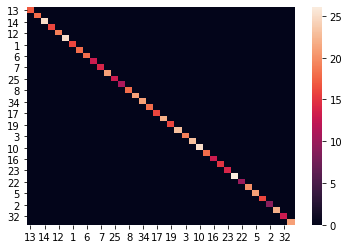

In [85]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=combined["Disease"].unique(), columns=combined['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [72]:
def predict(ml_model):
    model=ml_model.fit(x_train,y_train)
    print('Training score : {}'.format(model.score(x_train,y_train)))
    y_prediction=model.predict(x_test)
    print("Testing Accuracy : " , model.score(x_test , y_test))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Training score : 0.9999973383130233
Testing Accuracy :  0.9999895383387019


r2 score: 0.9999895383387019
MAE: 0.0031286549707602294
MSE: 0.0012090643274853803
RMSE: 0.03477160231403466


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


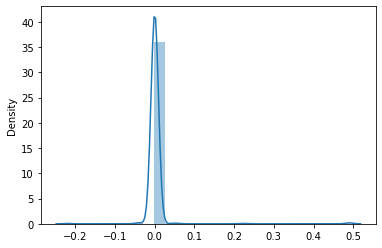

In [73]:
predict(RandomForestRegressor())

Training score : 0.22192695362700876
Testing Accuracy :  0.17551910117102776


r2 score: 0.17551910117102776
MAE: 8.131657261550888
MSE: 95.28605591950463
RMSE: 9.761457673908371


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


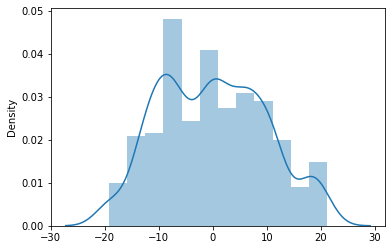

In [74]:
predict(LinearRegression())

Training score : 1.0
Testing Accuracy :  1.0


r2 score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


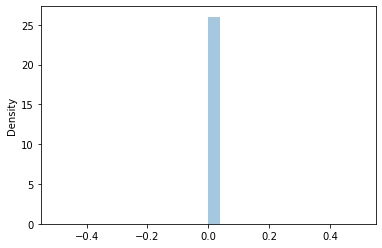

In [75]:
predict(DecisionTreeRegressor())

Training score : 1.0
Testing Accuracy :  1.0


r2 score: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


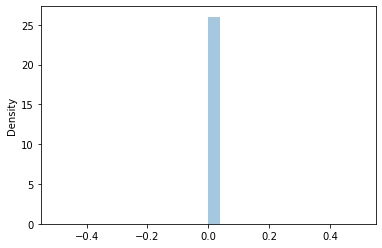

In [76]:
predict(SVC())